Problem statement : Given EEG data from subjects who were watching movies, let's try to predict the emotional state of a subject during a given movie.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasgui import show

df_data = pd.read_csv(r'C:\Users\Com\Downloads\Compressed\EEG data\emotions.csv')

In [3]:
df_data.shape

(2132, 2549)

In [4]:
# If any null Data in dataset
(df_data.isnull().sum()).sum()

0

In [5]:
data_X = df_data.iloc[:,:-1]
y = df_data.iloc[:,-1:]

In [5]:
data_X.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [9]:
show(data_X)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


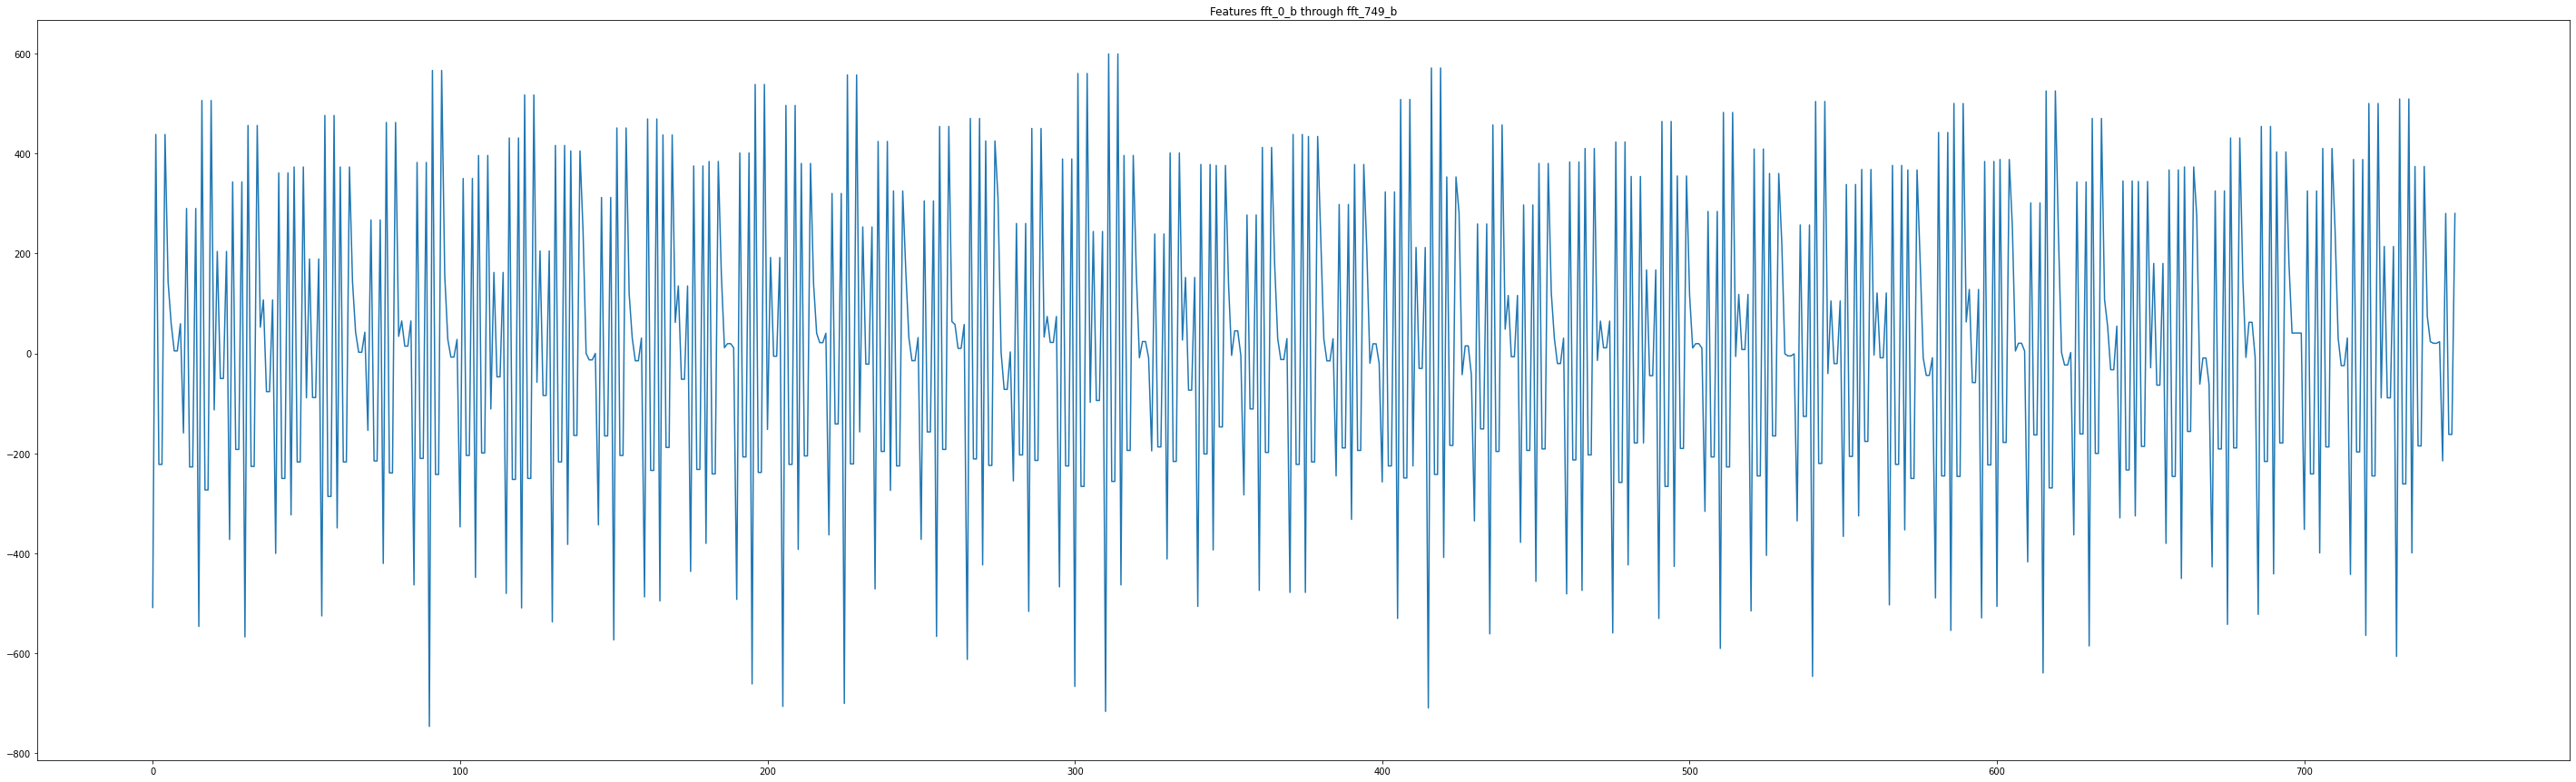

In [5]:
sampledata_X = data_X.loc[0,'fft_0_b':'fft_749_b']# only first row

plt.figure(figsize=(50,15))
plt.plot(range(len(sampledata_X)), sampledata_X)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

# Machine learning Model...

To reduce dimensions we would use PCA and PCs may be biased due to non standardized data... 

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_X)

X_scaled = scaler.transform(data_X)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 200,random_state=23)
pca.fit(X_scaled)

PCA(n_components=200, random_state=23)

In [8]:
print(pca.n_components_)
#print(pca.explained_variance_ratio_*100)
print(np.cumsum(pca.explained_variance_ratio_*100)[-1])

200
95.94966003708501


In [9]:
X_pca = pca.transform(data_X)

C:\Users\Com\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [76]:
X_pca[:5]

array([[-1.73429605e+12,  2.76548728e+11,  2.72626120e+12,
         5.79381144e+13,  2.95016352e+13,  1.37285595e+13,
         3.00052652e+13, -2.13141526e+12,  3.57755265e+10,
         1.29606830e+13,  1.39215369e+13, -9.28362251e+12,
         1.53495148e+12,  1.13617304e+13, -2.89636678e+12,
        -5.55939753e+12, -6.13635205e+12, -7.24520517e+12,
         1.02590044e+13,  1.63985034e+13,  9.39876903e+12,
         3.88466229e+12, -4.29967006e+12,  1.04507380e+13,
         2.11861065e+12,  3.48976504e+12,  1.38065471e+13,
         7.62949190e+12,  8.44980448e+11, -7.17413550e+12,
        -2.02420320e+13,  3.78282859e+12, -1.57075893e+12,
         6.70049507e+12, -3.15269300e+12,  7.85579093e+12,
         1.58421027e+13, -1.81590938e+13,  9.13041400e+12,
        -1.25600061e+12, -1.75861240e+12,  4.28259026e+12,
         5.37390963e+11,  3.79344227e+11,  2.00210613e+12,
        -5.49583336e+12,  1.14784261e+11, -3.17394187e+12,
         5.44382394e+12, -2.31118569e+12,  4.18962853e+1

In [10]:
X_pca.shape

(2132, 200)

In [11]:
y.value_counts()

label   
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
dtype: int64

In [12]:
#label mapping
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
y = y.replace(label_mapping)

In [13]:
X = X_pca
X.shape

(2132, 200)

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=43,test_size=0.32)

In [15]:
y_train

,label
2044,1
597,1
2043,0
218,2
1855,2
...,...
657,2
307,0
2064,0
2106,2


In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1449, 200) (683, 200) (1449, 1) (683, 1)


In [17]:
# to remove warning only
y_train = y_train.to_numpy().ravel()

In [18]:
y_train.shape

(1449,)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 16,solver='liblinear',max_iter = 200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=16, solver='liblinear')

In [20]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.4260614934114202

In [21]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,y_pred,average=None)
print(f1)

[0.56264775 0.         0.47844228]


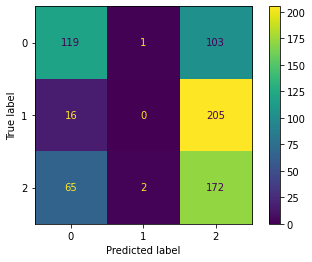

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [23]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(X_train,y_train)

GaussianNB()

In [24]:
y_pred2 = model2.predict(X_test)
print(model2.score(X_test,y_test))

0.39824304538799415


In [25]:
#from sklearn.metrics import f1_score 

f1 = f1_score(y_test,y_pred2,average=None)
print(f1)

[0.01762115 0.65281899 0.21505376]


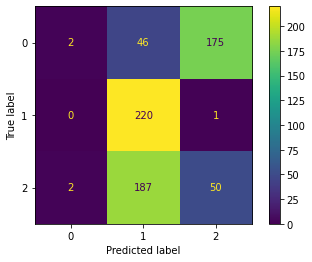

In [26]:
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model2.classes_)
disp.plot()

plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=300)
model3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [28]:
y_pred3 = model3.predict(X_test)
print(model3.score(X_test,y_test))

0.7745241581259151


In [29]:
#from sklearn.metrics import f1_score 

f1_RF = f1_score(y_test,y_pred3,average=None)
print(f1_RF)

[0.84665227 0.80470588 0.67782427]


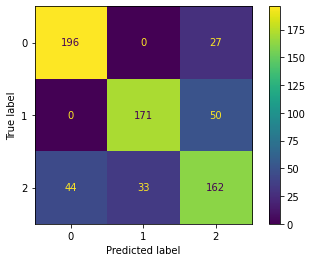

In [30]:
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model3.classes_)
disp.plot()

plt.show()

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

model4 = GradientBoostingClassifier(learning_rate = 0.001,n_estimators=100)
model4.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.001)

In [33]:
y_pred4 = model4.predict(X_test)
print(model4.score(X_test,y_test))

0.7862371888726208


In [34]:
#from sklearn.metrics import f1_score

f1_GB = f1_score(y_test,y_pred4,average=None)
print(f1_GB)

[0.85598377 0.81534772 0.68421053]


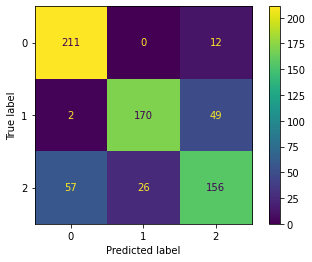

In [35]:
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred4)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model4.classes_)
disp.plot()

plt.show()

In [45]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

model5 = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1,
        max_depth = 5, alpha = 10, n_estimators = 10,use_label_encoder=False,eval_metric='mlogloss')

In [46]:
model5.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='mlogloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False, ...)

In [48]:
y_pred5 = model5.predict(X_test)
print(model5.score(X_test,y_test))

0.7569546120058566


In [49]:
f1_GB = f1_score(y_test,y_pred5,average=None)
print(f1_GB)

[0.85123967 0.77541371 0.64052288]


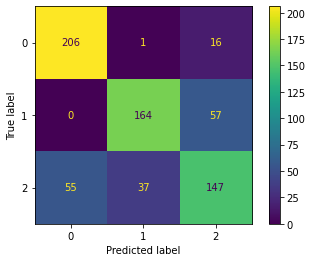

In [50]:
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model5.classes_)
disp.plot()

plt.show()

# Deeplearning Model...

In [16]:
type(y)

pandas.core.frame.DataFrame

In [20]:
# for deeplearning model training part
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_dl = le.fit_transform(y)
X_dl = data_X
#y_dl = y_dl.to_numpy().ravel()

X_train,X_test,y_train,y_test = train_test_split(X_dl,y_dl,random_state=43,test_size=0.32)

In [23]:
type(y_dl)

numpy.ndarray

In [22]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1449, 2548) (683, 2548) (1449,) (683,)


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Flatten, GRU, Input
from tensorflow.keras.models import Sequential, Model, load_model

inputs = tf.keras.Input(shape=(X_train.shape[1],1))

gru = tf.keras.layers.GRU(256, return_sequences=True)(inputs)
flat = Flatten()(gru)
outputs = Dense(3, activation='softmax')(flat)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________


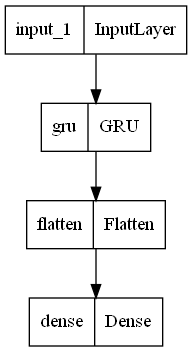

In [7]:
import pydotplus
from tensorflow.keras.utils import plot_model
#tf.keras.utils.vis_utils.pydot = pydotplus
tf.keras.utils.plot_model(model)

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(X_train,y_train,validation_split=0.25,batch_size=32,epochs=10,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)]
)

Epoch 1/10
34/34 [==============================] - 443s 13s/step - loss: 45.9398 - categorical_accuracy: 0.3600 - val_loss: 5.2753 - val_categorical_accuracy: 0.1873
Epoch 2/10
34/34 [==============================] - 456s 13s/step - loss: 3.7164 - categorical_accuracy: 0.3435 - val_loss: 4.9569 - val_categorical_accuracy: 0.1901
Epoch 3/10
34/34 [==============================] - 458s 13s/step - loss: 1.9631 - categorical_accuracy: 0.3471 - val_loss: 2.0817 - val_categorical_accuracy: 0.3140
Epoch 4/10
34/34 [==============================] - 489s 14s/step - loss: 2.7416 - categorical_accuracy: 0.3407 - val_loss: 3.0697 - val_categorical_accuracy: 0.2645
Epoch 5/10
34/34 [==============================] - 473s 14s/step - loss: 0.5898 - categorical_accuracy: 0.3444 - val_loss: 9.2988 - val_categorical_accuracy: 0.3802
Epoch 6/10
34/34 [==============================] - 462s 14s/step - loss: 1.8353 - categorical_accuracy: 0.3471 - val_loss: 6.9815 - val_categorical_accuracy: 0.3664
Epo

In [26]:
model.save(r'C:\Users\Com\Downloads\Compressed\EEG data')

INFO:tensorflow:Assets written to: C:\Users\Com\Downloads\Compressed\EEG data\assets


INFO:tensorflow:Assets written to: C:\Users\Com\Downloads\Compressed\EEG data\assets
